# HOMEWORK 1: GAMMA OF CASH/ASSET OR NOTHING OPTIONS
## Vitalii Rudko
## April, 2021

In [2]:
#Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [3]:
#Importing data
sp500_df = yf.download('^GSPC', 
                      start = '2020-04-25', 
                      end = '2021-04-25', 
                      interval = "1d",
                      progress = False)
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,2812.639893,2842.709961,2791.760010,2836.739990,2836.739990,5374480000
2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


In [8]:
#Calculating returns
returns = np.diff(np.log(np.array(sp500_df["Close"])))

#Maturity
T = 1

#Calculating volatility
vol = np.std(returns)*np.sqrt(252)

#Spot ptice (in points, one point worth $100)
S = np.array(range(3825,4175))

#Strike price
K = 4000

#Rsik-free rate (OIS on Effective Funds Rate)
#Source: https://www.swapsandbonds.com/
r = 0.0013

#Dividend yield 
q = 0

In [9]:
#Defining gamma functions for cash or nothing
def gamma_c_call(S, K, r, q, vol, T):
    #Estimating parameters
    d1 = (np.log(S / K) + (r - q + 0.5 * vol**2) * T) / (vol * T**0.5)
    d2 = d1 - vol * T**0.5
    
    #Estimating density function
    d2_n = norm.pdf(d2)
    #Estimating gamma
    gamma = -np.exp(-r * T) * d1 * d2_n / (vol ** 2 * S ** 2 * T)
    
    #Output
    return gamma

def gamma_c_put(S, K, r, q, vol, T):
    return -gamma_c_call(S, K, r, q, vol, T)

#Defining gamma functions for asset or nothing
def gamma_a_call(S, K, r, q, vol, T):
    #Estimating parameters
    d1 = (np.log(S / K) + (r - q + 0.5 * vol**2) * T) / (vol * T**0.5)
    d2 = d1 - vol * T**0.5
    
    #Estimating density function
    d1_n = norm.pdf(d1)
    
    #Estimating gamma
    gamma = -np.exp(-q * T) * d2 * d1_n / (vol ** 2 * S * T)
    
    #Output
    return gamma

def gamma_a_put(S, K, r, q, vol, T):
    return -gamma_a_call(S, K, r, q, vol, T)  

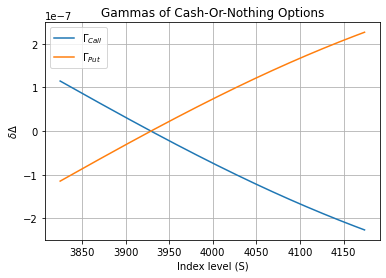

In [10]:
#Plotting gamma of cash or nothing call 
plt.plot(S, gamma_c_call(S, K, r, q, vol, T), label = "$\Gamma_{Call}$")

#Plotting gamma of cash or nothing put 
plt.plot(S, gamma_c_put(S, K, r, q, vol, T), label = "$\Gamma_{Put}$")

plt.title("Gammas of Cash-Or-Nothing Options")
plt.xlabel("Index level (S)")
plt.ylabel("$\delta\Delta$")
plt.legend()
plt.grid()

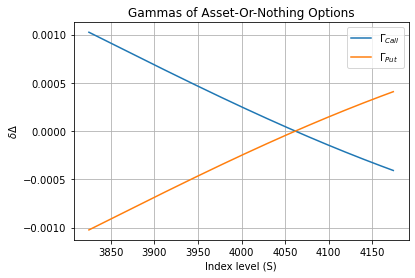

In [11]:
#Plotting gamma of cash or nothing call 
plt.plot(S, gamma_a_call(S, K, r, q, vol, T), label = "$\Gamma_{Call}$")

#Plotting gamma of cash or nothing put 
plt.plot(S, gamma_a_put(S, K, r, q, vol, T), label = "$\Gamma_{Put}$")

plt.title("Gammas of Asset-Or-Nothing Options")
plt.xlabel("Index level (S)")
plt.ylabel("$\delta\Delta$")
plt.legend()
plt.grid()

## Explanation
Both plots represent the second partial derivative of according option price formulas with respect to the spot prices of underlying asset $S$. Therefore they can be interpreted as a rate of change of sensitivity of the option price $\Delta$ with respect to $S$. In all cases $\Gamma$ moves as sinusoid, and at the boundaries or a strike price $K$ it is constant, as sensitivity of $\Delta$ there is low. In terms of probabilities when strike price $K$ is $3\sigma$ away from the spot price -- the volatility becomes irrelevant, therefore sensitivity is low. Meanwhile, when we are nearby $K$ it increases chances of crossing it, so the sensitivity is high.